In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.describe()

,Description
count,28
unique,28
top,The loan title provided by the borrower
freq,1


In [4]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, loan_amnt to pub_rec_bankruptcies
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  28 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [5]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [6]:
def feat_info(col):
    print(data_info.loc[col]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


## TIME FOR THE DATA

In [8]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Now that the data is loaded, we can begin exploratory data analysis

count plot off the label to be predicted

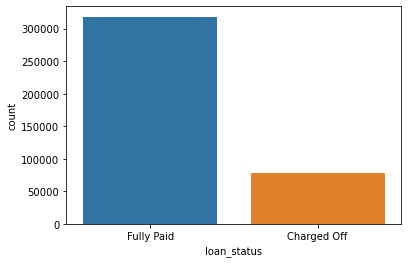

In [10]:
sns.countplot(x='loan_status',data=df)

histogram of loan_amnt

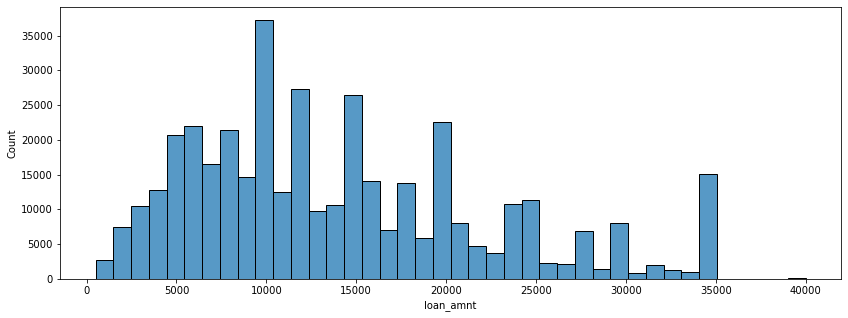

In [11]:
plt.figure(figsize=(14,5))
sns.histplot(x='loan_amnt',data=df,bins=40)

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


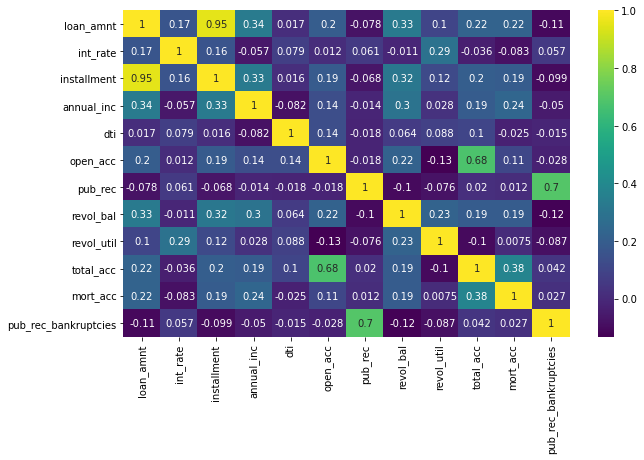

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

# there is a near perfect correlation with installment.. why?

In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


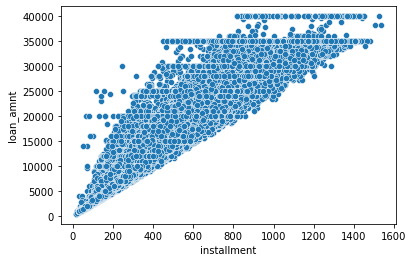

In [16]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

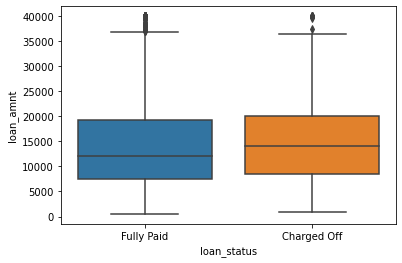

In [17]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

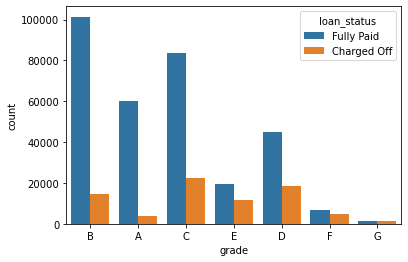

In [21]:
sns.countplot(x='grade',data=df,hue='loan_status')

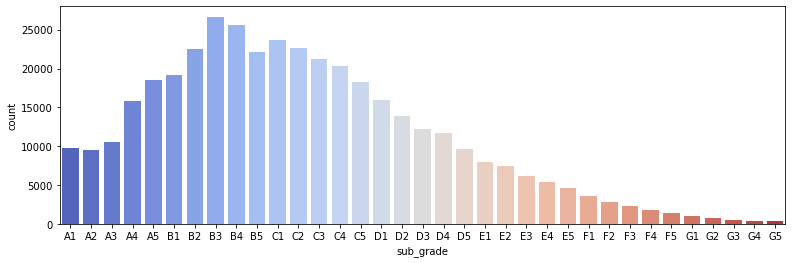

In [22]:
plt.figure(figsize=(13,4))
sns.countplot(x='sub_grade',data=df,order=df['sub_grade'].sort_values().unique(),palette='coolwarm')

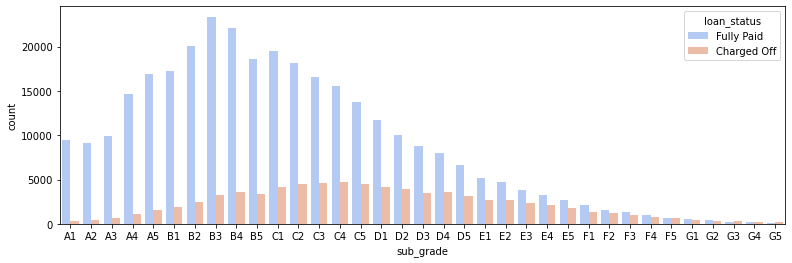

In [23]:
plt.figure(figsize=(13,4))
sns.countplot(x='sub_grade',data=df,order=df['sub_grade'].sort_values().unique(),palette='coolwarm',hue='loan_status')

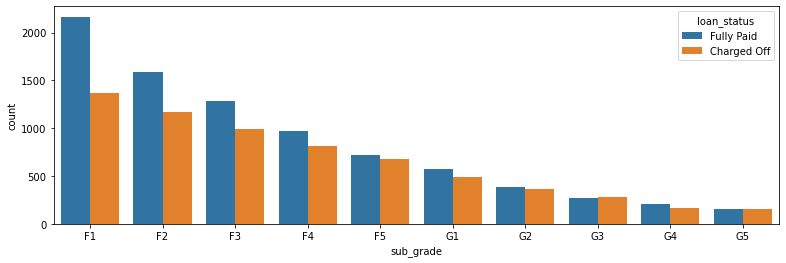

In [24]:
subdata = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(13,4))
sns.countplot(x='sub_grade',data=subdata,order=subdata['sub_grade'].sort_values().unique(),hue='loan_status')

# creating new column of 0s and 1s for if the loan was repaid

In [25]:
df['loan_repaid'] = df['loan_status'].apply(lambda loan: 1 if loan == 'Fully Paid' else 0)

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


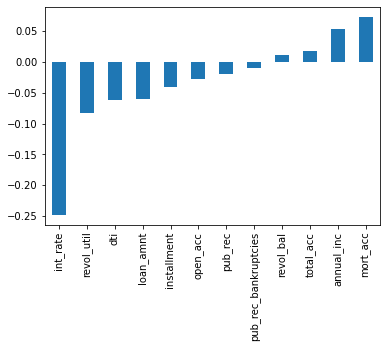

In [27]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data PreProcessing

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [29]:
len(df)

396030

In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [31]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
feat_info('emp_title')
print()
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [33]:
df['emp_title'].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
shift leadrr                          1
chief building inspector              1
Strategic Business Consultant         1
Simple Finance Technology Corp.       1
Network Eng. / Help Desk Mgr.         1
Name: emp_title, Length: 173105, dtype: int64

In [34]:
df.drop('emp_title',axis=1,inplace=True)

In [35]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

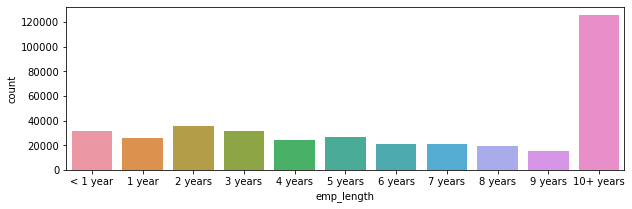

In [36]:
sortvals = ['< 1 year',
            '1 year',
            '2 years',
            '3 years',
            '4 years',
            '5 years',
            '6 years',
            '7 years',
            '8 years',
            '9 years',
            '10+ years']

plt.figure(figsize=(10,3))
sns.countplot(x='emp_length',
              data=df,
              order=sortvals)

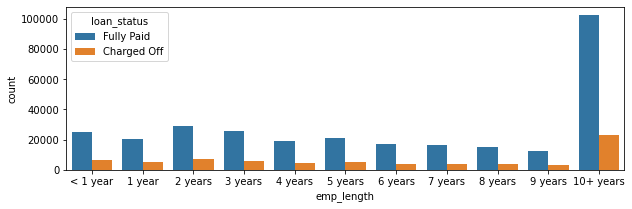

In [37]:
plt.figure(figsize=(10,3))
sns.countplot(x='emp_length',
              data=df,
              order=sortvals,
              hue='loan_status')

In [38]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [39]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [40]:
emp_len = emp_co/emp_fp

In [41]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

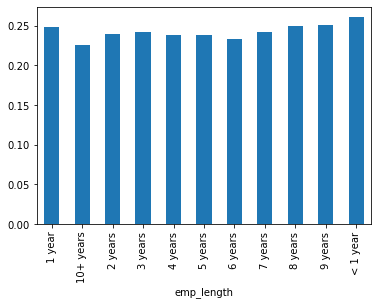

In [42]:
emp_len.plot(kind='bar')

### paid off/ charged off rates are practically the same for all employment lengths

#### we can drop this without much concern

In [43]:
df.drop('emp_length',axis=1,inplace=True)

In [44]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [45]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [46]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

#### title seems to be duplicate of the purpose column, appears dropping will be okay

In [47]:
df.drop('title',axis=1,inplace=True)

In [48]:
feat_info('mort_acc')

Number of mortgage accounts.


In [49]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [52]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [54]:
print('Mean of the mort_acc column per total_acc')
df.groupby('total_acc')['mort_acc'].mean()

Mean of the mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

### fill in the NaN values in mort_acc

In [55]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [56]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [57]:
df['mort_acc'] = df.apply(lambda row: fill_mort_acc(row['total_acc'],row['mort_acc']), axis = 1)

In [58]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

### rest of the null values make up less than .5% of the total data, we likely can just drop these.

In [59]:
df = df.dropna()

In [87]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### checking other columns that are not numeric

In [64]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [65]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [73]:
df['term'] = df['term'].apply(lambda row: 36 if row == ' 36 months' else 60)

C:\Users\Zac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### grade is a part of sub_grade so we can just drop it

In [84]:
df.drop('grade',axis=1,inplace=True)

C:\Users\Zac\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Sub_grade dummy value creation would be beneficial, let's do that.

In [88]:
subgrade_dum = pd.get_dummies(df['sub_grade'],drop_first=True)

In [89]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dum],axis=1)

In [90]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [94]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### We're going to do the same for 'verification_status','application_type','initial_list_status','purpose'

In [92]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### let's review the home-ownership column

In [95]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [96]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [97]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [98]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [99]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### Let's check again for the types that aren't numeric

In [100]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

#### let's engineer a zip-code column from the address column.

In [103]:
df['zipcode'] = df['address'].apply(lambda addr: addr[-5:])

In [104]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [105]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df = df.drop(['zipcode','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [106]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### when building a model for predicting. our model won't know the "issued_date" for the loan

In [107]:
#drop it
df = df.drop('issue_d',axis=1)

### let's take a look at "ealiest_cr_line"

In [108]:
df['earliest_cr_line'].head(5)

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [111]:
df['earliest_cr_yr'] = df['earliest_cr_line'].apply(lambda line: line[-4:])
df = df.drop('earliest_cr_line',axis=1)

In [114]:
df['earliest_cr_yr'] = df['earliest_cr_yr'].apply(int)

In [116]:
df['earliest_cr_yr']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_yr, Length: 395219, dtype: int64

In [115]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

# time for the model

### train_test_Split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
df = df.drop('loan_status',axis=1)

In [119]:
X= df.drop('loan_repaid',axis=1).values
y= df['loan_repaid'].values

In [120]:
len(df)

395219

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### normalize the data

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()

In [124]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### create the model

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [130]:
df.shape

(395219, 79)

In [132]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [133]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [135]:
model = Sequential()

model.add(Dense(79, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(40, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### fit and predict

In [136]:
model.fit(x=X_train,y=y_train
         ,epochs=25
         ,batch_size=256
         ,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.3628 - val_loss: 0.2653
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2669 - val_loss: 0.2639
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2639 - val_loss: 0.2621
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2634 - val_loss: 0.2619
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2604 - val_loss: 0.2616
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2591 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2601 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2578 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2603 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.259

### Time for Evaluation

In [137]:
losses = pd.DataFrame(model.history.history)

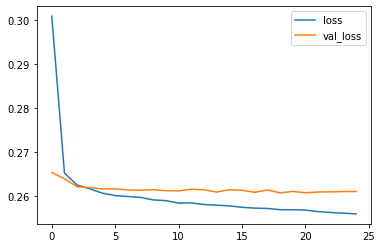

In [138]:
losses[['loss','val_loss']].plot()

In [139]:
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
predictions = model.predict_classes(X_test)

C:\Users\Zac\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [142]:
print(confusion_matrix(y_test,predictions))

[[ 6962  8696]
 [  185 63201]]


Let's test to see if the model can predict a random customer

In [143]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt         25000.00
term                 60.00
int_rate             18.24
installment         638.11
annual_inc        61665.00
                    ...   
48052                 0.00
70466                 0.00
86630                 0.00
93700                 0.00
earliest_cr_yr     1996.00
Name: 305323, Length: 78, dtype: float64

In [145]:
model.predict_classes(new_customer.values.reshape(1,78))

C:\Users\Zac\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [146]:
df.iloc[random_ind]['loan_repaid']

1.0

# winner winner!

### Let's save the model

In [147]:
from tensorflow.keras.models import load_model

In [148]:
model.save('Project-Model_LoanPayback')

INFO:tensorflow:Assets written to: Project-Model_LoanPayback\assets
